The [ImaGen](http://ioam.github.io/imagen) library provides composable, declarative, parameterized objects for rendering streams of bitmap images from geometric primitives or existing images.  ImaGen objects can return a [HoloViews](http://holoviews.org) object that will display itself automatically, and so it is simple to use ImaGen together with HoloViews to explore image generation and manipulation.  For instance, a simple image-filtering application can be set up very easily:

:DynamicMap   [size,positive_size,negative_size,positive_aspect_ratio,negative_aspect_ratio]
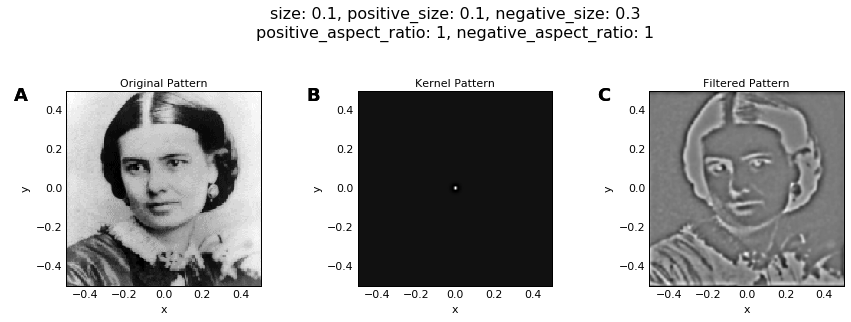

In [1]:
import numpy as np
import holoviews as hv
import imagen as ig
import imagen.transferfn as tf

from imagen.image import FileImage
from imagen.transferfn.sheet_tf import Convolve

hv.notebook_extension()

%opts Image (cmap="gray") {+axiswise}

FileImage.filename = "../../../imagen/doc/images/ellen_arthur.pgm"

kdims = [hv.Dimension('size',                   range=(0.1, 2)),
         hv.Dimension('positive_size',          range=(0.1, 2)),
         hv.Dimension('negative_size',          range=(0.3, 4)),
         hv.Dimension('positive_aspect_ratio',  range=(1.0,10)),
         hv.Dimension('negative_aspect_ratio',  range=(1.0,10))]

def filtered_images(size,positive_size,negative_size,positive_aspect_ratio,negative_aspect_ratio):
    convolver = Convolve(kernel_pattern=ig.DifferenceOfGaussians(**locals()))
    return FileImage()[:].relabel("Original") + \
           convolver.kernel_pattern[:].relabel("Kernel") + \
           FileImage(output_fns=[convolver])[:].relabel("Filtered")

hv.DynamicMap(filtered_images, kdims=kdims)